# Coin Flipping

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hieutrinhds/statistics_with_python/blob/master/00_probability_foundation/01_flip_a_coin.ipynb)

## Flip a coin
To simulate coin flip we use bernoulli scipy library

-  The first parameter is p, probability of success
- The second parameter is size, number of coin flips
- 'rvs' stand for 'random variates'


In [3]:
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import binom
bernoulli.rvs(p=0.5, size=1)

array([1])

## Flip multiples coins
Simulate by binomial
- n: numbers of coins flip
- change value of p to get the baised coin

In [5]:
from scipy.stats import binom

binom.rvs(n=10, p=0.5, size=1)

array([4])

In [6]:
binom.rvs(n=10, p=0.5, size=10)

array([3, 4, 6, 3, 5, 4, 6, 6, 3, 6])

Setting seed generator

In [11]:
binom.rvs(n=10, p=0.5, size=1, random_state=42)

# or

np.random.seed(42)


# Simulate ten coin flips and get the number of heads
ten_coin_flips = bernoulli.rvs(p=0.35, size=10)
coin_flips_sum = sum(ten_coin_flips)
print(coin_flips_sum)

 Simulate 20 trials of 10 coin flips with a 35% chance of getting heads.

In [14]:
draws = binom.rvs(n=10, p=0.35, size=20)

## Probability mass and distribution functions
Calculate the probability of getting a particular outcome fo a discrete random variable

### Probability mass function

Calculate probabilty of getting k heads from n coin flips with p probability of getting heads
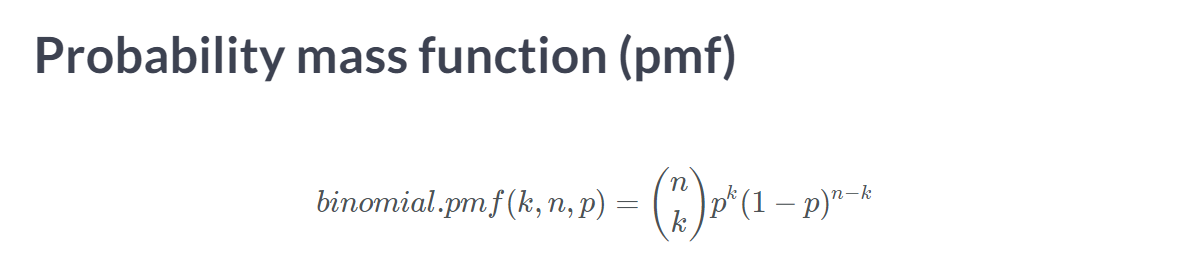

In [15]:
# Probability of 2 heads after 10 throws with a fair coin
binom.pmf(k=2, n=10, p=0.5)

0.04394531249999999

In [16]:
# Probability of getting 50 heads after 100 throws with biased coin p=0.3
binom.pmf(k=50, n=100, p=0.3)

1.3026227131445298e-05

### Cumulative distribution function (cdf)

Getting a range of probabilities rather than the probablity of a single event
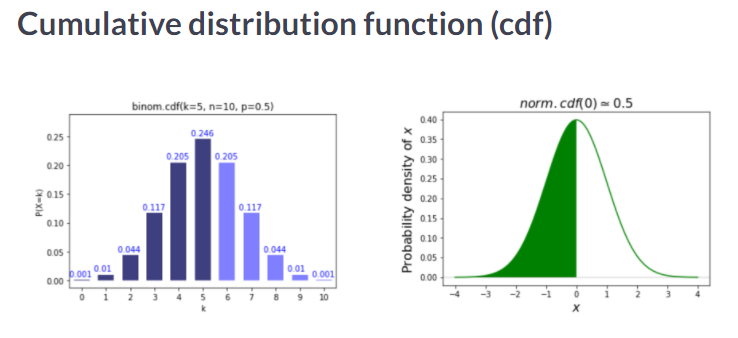

In [19]:
# Probability of 5 heads of less after 10 throw with a fair coin
binom.cdf(k=5, n=10, p=0.5)

0.6230468749999999

In [20]:
# Probability of 50 heads or less after 100 throws biased coin with chance of getting head p=0.3
binom.cdf(k=50, n=100, p=0.3)

0.9999909653138043

In [24]:
# Probability of more than 59 heads after 100 throws with p=0.7
draw1 = 1-binom.cdf(k=59, n=100, p=0.7)
print(f"probability1:{draw1}")

draw2 = binom.sf(k=59, n=100, p=0.7) # sf stands for survival function
print(f"probability2:{draw2}")

assert draw1 ==  draw2

probability1:0.9875015928335618
probability2:0.9875015928335618


### Example 1 Predict probability of defect

From the thousands of components that we got from a supplier, we are going to take a sample of 50 selected randomly. The agreed and accepted defect rate is 2%

In [27]:
# Probability of getting exactly 1 defective component
prob_one_defect = binom.pmf(k=1, n=50, p=0.02)
print(prob_one_defect)

0.37160171437461204


In [29]:
# Probability not of getting exactly 1 defective component
prob_no_defects = binom.pmf(k=0, n=50, p=0.02)
print(prob_no_defects)

0.3641696800871171


In [30]:
# Probability of getting 2 or less defective components
prob_two_or_less_defects = binom.cdf(k=2, n=50, p=0.02)
print(prob_two_or_less_defects)

0.9215722516490308


### Example 2 Predicting employment status
Consider a survey about employment that contains the question "Are you employed?" It is known that 65% of respondents will answer "yes." Eight survey responses have been collected.

In [31]:
# Calculate the probability of getting exactly 5 yes responses
prob_five_yes = binom.pmf(k=5, n=8, p=0.65)
print(prob_five_yes)

0.27858577906250004


In [33]:
# Calculate the probability of getting 3 or less no responses
prob_three_or_less_no = 1-binom.cdf(k=3, n=8, p=0.65)
print(prob_three_or_less_no)

0.8939090951171875


In [34]:
# Calculate the probability of getting more than 3 yes responses
prob_more_than_three_yes = binom.sf(k=3, n=8, p=0.65)
print(prob_more_than_three_yes)

0.8939090951171875


### Example 3 Predicting burglary conviction rate

Imagine that in your town there are many crimes, including burglaries, but only 20% of them get solved. Last week, there were 9 burglaries

In [35]:
# What is the probability of solving 4 burglaries?
four_solved = binom.pmf(k=4, n=9, p=0.2)
print(four_solved)

0.06606028799999998


In [36]:
# What is the probability of solving more than 3 burglaries?
more_than_three_solved = binom.sf(k=3, n=9, p=0.2)
print(more_than_three_solved)

0.08564172800000006


In [38]:
# What is the probability of solving 2 or 3 burglaries?
two_or_three_solved = binom.pmf(k=2, n=9, p=0.2) + binom.pmf(k=3, n=9, p=0.2)
print(two_or_three_solved)

0.47815065599999973


In [39]:
# What is the probability of solving 1 or fewer or more than 7 burglaries?
tail_probabilities = binom.cdf(k=1, n=9, p=0.2) + binom.sf(k=7, n=9, p=0.2)
print(tail_probabilities)

0.43622655999999993


## Expected value, mean, and variance

### Expected value
Expected value: sum of possible outcomes weighted by it's probability.
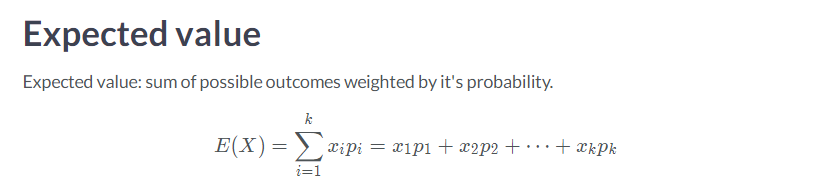
A discrete random variable has finite outcomes. For instance the roll of a die has only six possible outcomes.
In simple terms, Expected value is the value where the probability will concentrate when you repeat the experiment

### Arithmetic mean
Each x is the outcome from one experiment (i.e., a coin ip, either 0 or 1)
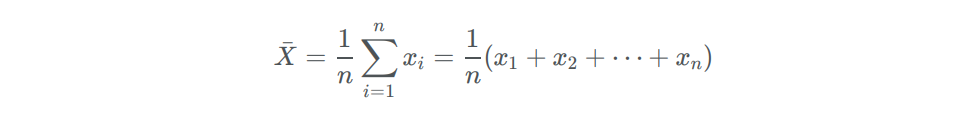

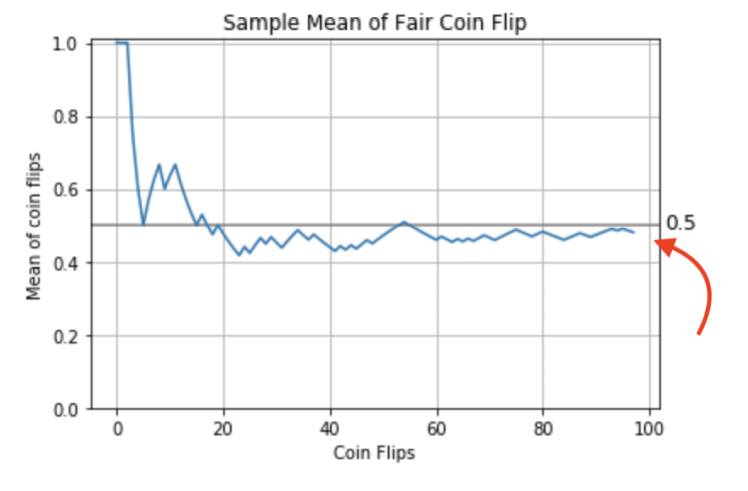

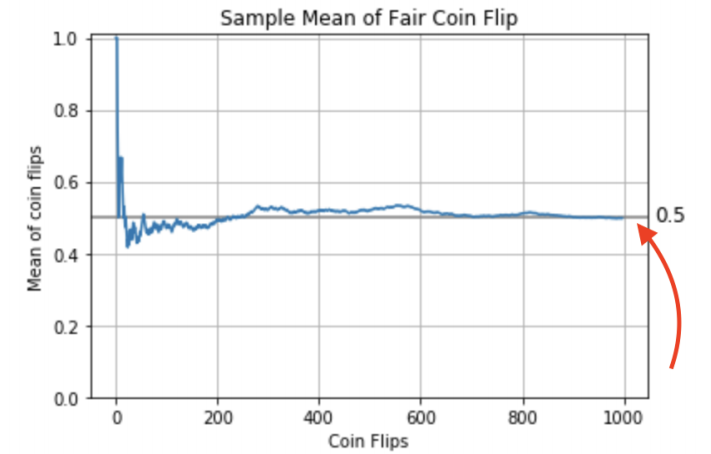

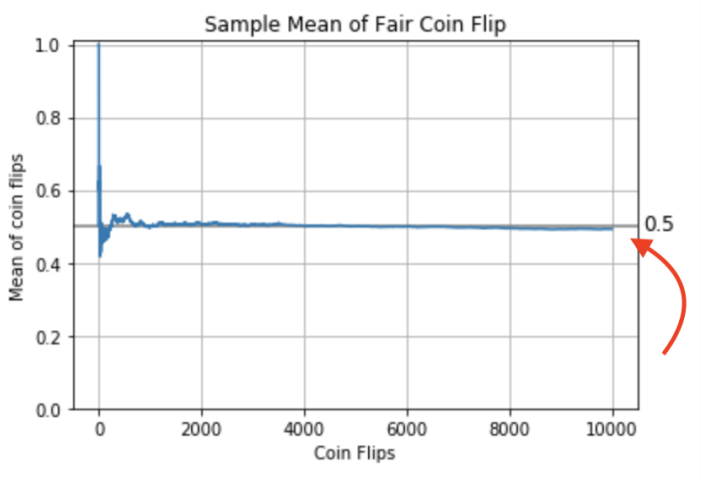

### Variance
Variance is a measure of dispersion.
It's the expected value ofthe squared deviation from its expected value.

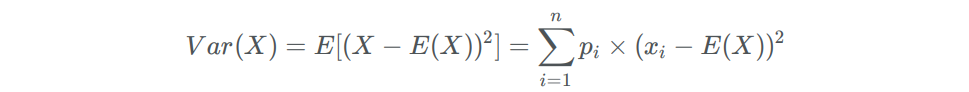

In [4]:
 # Calculate the expected value and the variance from a binomial distribution with parameters n=10 and p=0.25
binom.stats(n=10, p=0.25)

(array(2.5), array(1.875))

### Calculating the sample mean

In [6]:
from scipy.stats import describe

# Sample mean from a generated sample of 100 fair coin flips
sample_of_100_flips = binom.rvs(n=1, p=0.5, size=100)
sample_mean_100_flips = describe(sample_of_100_flips).mean
print(sample_mean_100_flips)

0.56


In [7]:
# Sample mean from a generated sample of 1,000 fair coin flips
sample_mean_1000_flips = describe(binom.rvs(n=1, p=0.5, size=1000)).mean
print(sample_mean_1000_flips)

0.499


In [8]:
# Sample mean from a generated sample of 2,000 fair coin flips
sample_mean_2000_flips = describe(binom.rvs(n=1, p=0.5, size=2000)).mean
print(sample_mean_2000_flips)

0.4885


### Checking the result

In [9]:
sample = binom.rvs(n=10, p=0.3, size=2000)

# Calculate the sample mean and variance from the sample variable
sample_describe = describe(sample)

# Calculate the sample mean using the values of n and p
mean = 10*0.3

# Calculate the sample variance using the value of 1-p
variance = mean*(1-0.3)

# Calculate the sample mean and variance for 10 coin flips with p=0.3
binom_stats = binom.stats(n=10, p=0.3)

print(sample_describe.mean, sample_describe.variance, mean, variance, binom_stats)

3.0455 2.127493496748374 3.0 2.0999999999999996 (array(3.), array(2.1))


### Calculating the mean and variance of a sample

1. Inside a loop, create a sample variable with 10 trials of 10 coin flips with 25% probability of getting heads.

2. Using the describe() function, calculate the mean of the provided averages array.
Using the describe() function, calculate the mean of the provided variances array.



In [12]:
averages = []
variances = []
for i in range(0, 1500):
    # 10 trials of 10 coin flips with 25% probability of heads
    sample = binom.rvs(n=10, p=0.25, size=10)
    # Mean and variance of the values in the sample variable
    averages.append(describe(sample).mean)
    variances.append(describe(sample).variance)
    
# Calculate the mean of the averages variable
print("Mean {}".format(describe(averages).mean))

# Calculate the mean of the variances variable
print("Variance {}".format(describe(variances).mean))

Mean 2.502
Variance 1.8537037037037039
